# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [3]:
import pandas as pd

## imports for Python, Pandas

In [6]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [4]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [7]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [8]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,info.governor,state,shortname
0,Dade,12345,Rick Scott,Florida,FL
1,Broward,40000,Rick Scott,Florida,FL
2,Palm Beach,60000,Rick Scott,Florida,FL
3,Summit,1234,John Kasich,Ohio,OH
4,Cuyahoga,1337,John Kasich,Ohio,OH


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [1]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

NameError: name 'json' is not defined

In [2]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

NameError: name 'pd' is not defined

****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [3]:
# Exercise 1. - Find the 10 countries with the most projects
import pandas as pd # Import the modules
import json
from pandas.io.json import json_normalize
import matplotlib as plt

In [4]:
wb_data = 'data/world_bank_projects.json' # load datapath into variable

In [5]:
wb_json = json.load((open(wb_data))) # load json file

In [6]:
#print out list of keys and values from two or 3 dicts in the list of dicts
for dict in wb_json[:2]:
    print('\n---\n')
    for key in dict.keys():
        print('key: '+ key + '    Value: ', dict[key])


---

key: sector    Value:  [{'Name': 'Primary education'}, {'Name': 'Secondary education'}, {'Name': 'Public administration- Other social services'}, {'Name': 'Tertiary education'}]
key: supplementprojectflg    Value:  N
key: projectfinancialtype    Value:  IDA
key: prodline    Value:  PE
key: mjtheme    Value:  ['Human development']
key: idacommamt    Value:  130000000
key: impagency    Value:  MINISTRY OF EDUCATION
key: project_name    Value:  Ethiopia General Education Quality Improvement Project II
key: mjthemecode    Value:  8,11
key: closingdate    Value:  2018-07-07T00:00:00Z
key: totalcommamt    Value:  130000000
key: id    Value:  P129828
key: mjsector_namecode    Value:  [{'code': 'EX', 'name': 'Education'}, {'code': 'EX', 'name': 'Education'}, {'code': 'BX', 'name': 'Public Administration, Law, and Justice'}, {'code': 'EX', 'name': 'Education'}]
key: docty    Value:  Project Information Document,Indigenous Peoples Plan,Project Information Document
key: sector1    Value:  {

In [7]:
#import the jason data as a data frame using some relivant keys
wb_projects = json_normalize(wb_json, '_id', ['id','project_name','countrycode','countryshortname'],errors='ignore') # create table from json list of dicts
wb_projects.head() #print head of the table of projects

,0,id,project_name,countrycode,countryshortname
0,$oid,P129828,Ethiopia General Education Quality Improvement...,ET,Ethiopia
1,$oid,P144674,TN: DTF Social Protection Reforms Support,TN,Tunisia
2,$oid,P145310,Tuvalu Aviation Investment Project - Additiona...,TV,Tuvalu
3,$oid,P144665,Gov't and Civil Society Organization Partnership,RY,"Yemen, Republic of"
4,$oid,P144933,Second Private Sector Competitiveness and Econ...,LS,Lesotho


Top 10 countries by number of projects:

                    No. Projects
Country                         
Indonesia                     19
China                         19
Vietnam                       17
India                         16
Yemen, Republic of            13
Nepal                         12
Bangladesh                    12
Morocco                       12
Mozambique                    11
Pakistan                       9


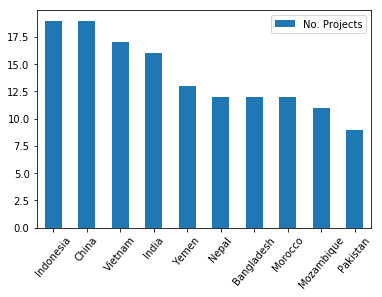

In [8]:
#group countries by country name and count up the number of projects by unique ID no. 
project_count = wb_projects.groupby(['countryshortname'])['id'].count()
project_count = project_count.sort_values(ascending=False) #sort by number of projects
project_count.pop('Africa') #Africa is not a country, lets remove it
project_count.name = 'No. Projects' #re-name the series

#create a top 10 data frame by slicing the project count series
top10df = pd.DataFrame(project_count[:10])
top10df.index.name = 'Country'

#print the top 10 dataframe
print('Top 10 countries by number of projects:\n')
print(top10df)

#The axis lables of the plot won't look very good with "Yemen, Republic of" in there. Let's rename it. 
indexlist = top10df.index.tolist()
indexlist[4] = 'Yemen'
top10df.index = indexlist

#Plot the top 10 countries
top10df.plot(kind='bar', rot=50)
plt.pyplot.show()

In [9]:
#Exercise 2 and 3 find the top 10 major project themes using column 'mjtheme_namecode'
#Create a dataframe with the missing names filled in.

wbdf = pd.read_json(wb_data,) # read wb json data into data frame

In [32]:
themedf = wbdf[['id','countrycode','countryshortname','mjtheme_namecode']] #slice df into relevant columns
themedf.head()

,id,countrycode,countryshortname,mjtheme_namecode
0,P129828,ET,Ethiopia,"[{'code': '8', 'name': 'Human development'}, {..."
1,P144674,TN,Tunisia,"[{'code': '1', 'name': 'Economic management'},..."
2,P145310,TV,Tuvalu,"[{'code': '5', 'name': 'Trade and integration'..."
3,P144665,RY,"Yemen, Republic of","[{'code': '7', 'name': 'Social dev/gender/incl..."
4,P144933,LS,Lesotho,"[{'code': '5', 'name': 'Trade and integration'..."


In [33]:
#turn the column into a list
themelist = themedf.mjtheme_namecode.tolist()
print(themelist[:10])

[[{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': ''}], [{'code': '1', 'name': 'Economic management'}, {'code': '6', 'name': 'Social protection and risk management'}], [{'code': '5', 'name': 'Trade and integration'}, {'code': '2', 'name': 'Public sector governance'}, {'code': '11', 'name': 'Environment and natural resources management'}, {'code': '6', 'name': 'Social protection and risk management'}], [{'code': '7', 'name': 'Social dev/gender/inclusion'}, {'code': '7', 'name': 'Social dev/gender/inclusion'}], [{'code': '5', 'name': 'Trade and integration'}, {'code': '4', 'name': 'Financial and private sector development'}], [{'code': '6', 'name': 'Social protection and risk management'}, {'code': '6', 'name': ''}], [{'code': '2', 'name': 'Public sector governance'}, {'code': '4', 'name': 'Financial and private sector development'}], [{'code': '11', 'name': 'Environment and natural resources management'}, {'code': '8', 'name': ''}], [{'code': '10', 'name': 'Rural deve

In [54]:
#Create a df of the themes includeing their names
themedf = pd.DataFrame(index=range(12),columns=['Name','Project Count'])
for value in range(12):
    themedf.iloc[value][1] = 0

#Loop through the list of dictionaries and populate theme df with a count themes by code no. 
for lst in themelist:
    for dct in lst:
        themedf.iloc[int(dct['code'])][1] += 1
        if dct['name'] != '':
            themedf.iloc[int(dct['code'])][0] = dct['name'] # Populate names by code no. if they are not blank

#clean up the df
themedf.index.name = 'Theme Code' #rename the index
themedf.dropna(axis=0, how='any', inplace=True) #drop out missing values
print(themedf)

                                                    Name Project Count
Theme Code                                                            
1                                    Economic management            38
2                               Public sector governance           199
3                                            Rule of law            15
4               Financial and private sector development           146
5                                  Trade and integration            77
6                  Social protection and risk management           168
7                            Social dev/gender/inclusion           130
8                                      Human development           210
9                                      Urban development            50
10                                     Rural development           216
11          Environment and natural resources management           250


Top 10 Major Project Themes
                                                    Name Project Count
Theme Code                                                            
11          Environment and natural resources management           250
10                                     Rural development           216
8                                      Human development           210
2                               Public sector governance           199
6                  Social protection and risk management           168
4               Financial and private sector development           146
7                            Social dev/gender/inclusion           130
5                                  Trade and integration            77
9                                      Urban development            50
1                                    Economic management            38


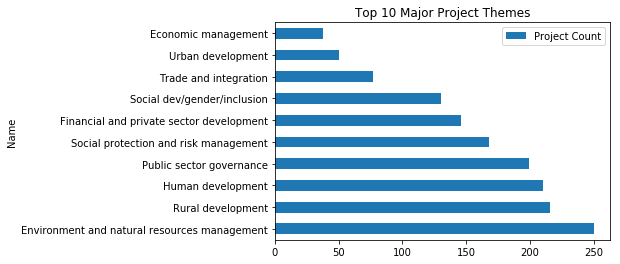

In [55]:
#Print and plot the top 10 themes.
top10themesdf = themedf.sort_values('Project Count', ascending=False)[:10]
print('Top 10 Major Project Themes')
print(top10themesdf)

top10themesdf.plot(kind='barh', x='Name', y='Project Count', title='Top 10 Major Project Themes')
plt.pyplot.show()